# Mistaken Mice notebook

2020 NMA academy project, mistaken mice group, pod 173 antique cicada

# Import packages and functions

In [2]:
# to import the functions we wrote, clone the git repo
# !git clone https://github.com/jorgeerrz/mistaken_mice.git
# %cd mistaken_mice
#alternatively, run the notebook locally, then just comment the lines above

from filter import *
from summarise_dataset import *
from PCA_fun import *
from GLM import *

# Loading of Steinmetz data

In [4]:
#@title Data retrieval
import os, requests

fname = []
for j in range(3):
  fname.append('steinmetz_part%d.npz'%j)


In [ ]:
# skip if you already downloaded the data
url = ["https://osf.io/agvxh/download"]
url.append("https://osf.io/uv3mw/download")
url.append("https://osf.io/ehmw2/download")

for j in range(len(url)):
  if not os.path.isfile(fname[j]):
    try:
      r = requests.get(url[j])
    except requests.ConnectionError:
      print("!!! Failed to download data !!!")
    else:
      if r.status_code != requests.codes.ok:
        print("!!! Failed to download data !!!")
      else:
        with open(fname[j], "wb") as fid:
          fid.write(r.content)

In [5]:
#@title Data loading
import numpy as np

alldat = np.array([])
for j in range(len(fname)):
  alldat = np.hstack((alldat, np.load('steinmetz_part%d.npz'%j, allow_pickle=True)['dat']))


# Filter the data

In [11]:
# need to loop over all sessions to pass as input to summarise_data function in next step
first_session_filtered = filter_spikes(alldat,0) 
print(np.shape(first_session_filtered[0]))

(178, 10, 100)


# Summarise the filtered data

{'n_neurons': array([ 734., 1070.,  619., 1769., 1077., 1169.,  584., 1156.,  788.,
        1172.,  857.,  698.,  983.,  756.,  743.,  474.,  565., 1089.,
         606.,  899.,  578.,  646., 1268., 1337.,  885., 1056.,  563.,
         549.,  750.,  942.,  977.,  522.,  613.,  781.,  795.,  680.,
        1055.,  805., 1348.]),
 'n_trials': array([214., 251., 228., 249., 254., 290., 252., 250., 372., 447., 342.,
        340., 300., 268., 404., 280., 224., 316., 247., 235., 124., 444.,
        151., 187., 261., 178., 253., 142., 128., 143., 237., 260., 191.,
        296., 311., 258., 181., 199., 343.]),
 'n_timebins': array([250., 250., 250., 250., 250., 250., 250., 250., 250., 250., 250.,
        250., 250., 250., 250., 250., 250., 250., 250., 250., 250., 250.,
        250., 250., 250., 250., 250., 250., 250., 250., 250., 250., 250.,
        250., 250., 250., 250., 250., 250.])}

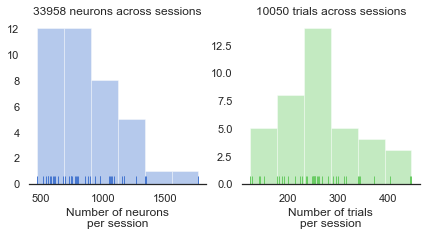

In [13]:
summarise_dataset(alldat) # should be filtered data, but alldat is used here as an example


# Change the time bin
Optional step

In [ ]:
#

# Principal Component Analysis
For now, just one session

In [9]:
neurons_PCA(first_session_filtered,0.1,51,130)

TypeError: tuple indices must be integers or slices, not str

# General Linear Model 

In [ ]:
# reshaping_features(features, axis_pc = 0, axis_trial = 1, axis_time = 2)
# GLM_logistic(features, choices, pen = "l2", lambda_L2 = 1)